In [2]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d|ice|');
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #818286; font-family: 'Roboto';}
span {font-family:'Roboto'; color:black; text-shadow: 5px 5px 5px #aaa;}  
div.output_area pre{font-family:'Roboto'; font-size:110%; color:lightblue;}      
</style>
      
      
    

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import csv

In [4]:
ESR=pd.read_excel(r'D:/Epileptic Seizure Recognition.xlsx')


In [5]:
ESR.head()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


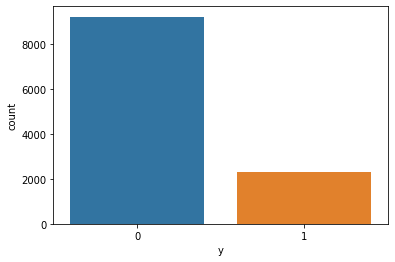

In [7]:
cols = ESR.columns
tgt = ESR.y
tgt[tgt>1]=0
ax = sn.countplot(tgt,label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [8]:
ESR.isnull().sum()


X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X7      0
X8      0
X9      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X25     0
X26     0
X27     0
X28     0
X29     0
X30     0
       ..
X150    0
X151    0
X152    0
X153    0
X154    0
X155    0
X156    0
X157    0
X158    0
X159    0
X160    0
X161    0
X162    0
X163    0
X164    0
X165    0
X166    0
X167    0
X168    0
X169    0
X170    0
X171    0
X172    0
X173    0
X174    0
X175    0
X176    0
X177    0
X178    0
y       0
Length: 179, dtype: int64

In [9]:
ESR.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.7 MB


In [10]:
X = ESR.iloc[:,1:179].values
X.shape


(11500, 178)

Text(0.5, 0, 'Samples')

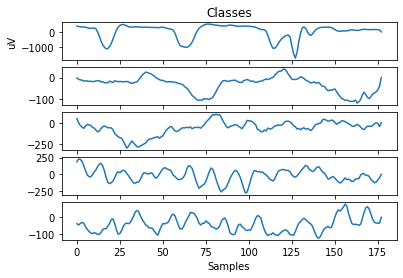

In [11]:
plt.subplot(511)
plt.plot(X[1,:])
plt.title('Classes')
plt.ylabel('uV')
plt.subplot(512)
plt.plot(X[7,:])
plt.subplot(513)
plt.plot(X[12,:])
plt.subplot(514)
plt.plot(X[0,:])
plt.subplot(515)
plt.plot(X[2,:])
plt.xlabel('Samples')

In [13]:
y = ESR.iloc[:,178].values
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
y[y>1]=0
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression   #LR
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' %')


C:\Users\Anusha Arun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


100.0 %


In [23]:
from sklearn.svm import SVC                #SVM
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_svc) + '%')

new_input = [[[590,328,88,-106,-456,-732,-921,-782,-522,-248,-68,89,221,342,336,219,82,-32,-83,-114,-134,-134,-113,-101,-109,-112,-117,-103,-83,-20,220,564,957,1162,1125,975,807,715,677,425,40,-553,-950,-993,-554,49,574,816,732,495,61,-312,-497,-463,-258,-73,35,73,66,24,-19,-44,-48,-52,-48,-19,33,94,148,184,206,215,233,228,231,233,226,239,242,265,263,203,66,-108,-272,-373,-422,-406,-363,-309,-257,-207,-178,-151,-134,-69,208,593,918,867,602,220,-163,-553,-888,-1015,-880,-568,-216,76,288,360,284,116,-93,-253,-314,-308,-272,-247,-251,-249,-239,-225,-222,-237,-269,-287,-259,-202,-51,258,610,993,1096,1016,856,721,695,678,477,103,-471,-831,-889,-541,-94,284,436,321,128,-131,-332,-358,-320,-203,-80,23,103,151,169,173,176,173,172,191,217,248,271,312,360,421,445,413,310,177,41,-71]]]


out_put = clf.predict(new_input[:])
print(out_put)

100.0%


ValueError: Found array with dim 3. Estimator expected <= 2.

In [19]:
from sklearn.neighbors import KNeighborsClassifier      #KNN
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_knn)+'%')

94.48%


In [20]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
acc_PCA = round(pca.score(X_train, y_train) )
print (str(acc_PCA) + '%')

90.0%
